In [1]:
import os
import shutil as sh
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib.animation as animation
from IPython.display import HTML
from matplotlib import rc
import VASPsol as vs
rc('animation', html='html5')
%matplotlib inline

In [2]:
from dask.distributed import Client, LocalCluster, progress
cluster = LocalCluster(n_workers=8, threads_per_worker=1)
client = Client(cluster)
client

Connection method: Cluster object,Cluster type: distributed.LocalCluster
Dashboard: http://127.0.0.1:8787/status,
Dashboard: http://127.0.0.1:8787/status,Workers: 8
Total threads: 8,Total memory: 125.39 GiB
Status: running,Using processes: True
Comm: tcp://127.0.0.1:34906,Workers: 8
Dashboard: http://127.0.0.1:8787/status,Total threads: 8
Started: Just now,Total memory: 125.39 GiB
Comm: tcp://127.0.0.1:42119,Total threads: 1
Dashboard: http://127.0.0.1:44528/status,Memory: 15.67 GiB
Nanny: tcp://127.0.0.1:33883,


In [3]:
def load_rhob(directory):
    try:
        return vs.Chgcar.from_file(directory + '/RHOB').linear_slice([0.5, 0.5, 0], [0.5, 0.5, 1])
    except:
        return None

In [6]:
# lets get the grid search result directories that have "VAC" directories in them
dir = '../shape_animation_data/0008noc/'
data = vs.data(dir)
data.ml_df

/blue/hennig/ericfonseca/NASA/VASPsol/Truhlar_Benchmarks/VaspPysol/shape_animation_data/0008noc/Solvent_water_epsilon_78.4_Ionic_0_calc_linear_NC_K_0.0025_SIGMA_K_0.4736842105263158_TAU_0.000525_LRHOB_TRUE
/blue/hennig/ericfonseca/NASA/VASPsol/Truhlar_Benchmarks/VaspPysol/shape_animation_data/0008noc/Solvent_water_epsilon_78.4_Ionic_0_calc_linear_NC_K_0.0025_SIGMA_K_1.1578947368421053_TAU_0.000525_LRHOB_TRUE
/blue/hennig/ericfonseca/NASA/VASPsol/Truhlar_Benchmarks/VaspPysol/shape_animation_data/0008noc/Solvent_water_epsilon_78.4_Ionic_0_calc_linear_NC_K_0.001_SIGMA_K_0.6_TAU_0.000525_LRHOB_TRUE
/blue/hennig/ericfonseca/NASA/VASPsol/Truhlar_Benchmarks/VaspPysol/shape_animation_data/0008noc/Solvent_water_epsilon_78.4_Ionic_0_calc_linear_NC_K_1.0394736842105263e-05_SIGMA_K_1.0_TAU_0.000525_LRHOB_TRUE
/blue/hennig/ericfonseca/NASA/VASPsol/Truhlar_Benchmarks/VaspPysol/shape_animation_data/0008noc/Solvent_water_epsilon_78.4_Ionic_0_calc_linear_NC_K_0.004368421052631579_SIGMA_K_0.6_TAU_0.0005

,Solvent,FileHandle,directory,NC_K,SIGMA_K,TAU,Solvation_Energy,Total_Energy,No.,SoluteName,...,OP,S,HS,OS,SP,SS,TotalArea,error,error_ev,error_frac
0,water,0008noc,/blue/hennig/ericfonseca/NASA/VASPsol/Truhlar_...,0.002500,0.473684,0.000525,0.091720,-139.567790,2100,n-octane,...,0.0,0.0,0.0,0.0,0.0,0.0,243.846,0.774937,0.033605,0.268144
1,water,0008noc,/blue/hennig/ericfonseca/NASA/VASPsol/Truhlar_...,0.002500,1.157895,0.000525,-0.568520,-140.228030,2100,n-octane,...,0.0,0.0,0.0,0.0,0.0,0.0,243.846,16.000071,0.693845,5.536357
2,water,0008noc,/blue/hennig/ericfonseca/NASA/VASPsol/Truhlar_...,0.001000,0.600000,0.000525,0.133520,-139.525990,2100,n-octane,...,0.0,0.0,0.0,0.0,0.0,0.0,243.846,-0.188971,-0.008195,-0.065388
3,water,0008noc,/blue/hennig/ericfonseca/NASA/VASPsol/Truhlar_...,0.000010,1.000000,0.000525,0.875860,-138.783650,2100,n-octane,...,0.0,0.0,0.0,0.0,0.0,0.0,243.846,-17.307332,-0.750535,-5.988696
4,water,0008noc,/blue/hennig/ericfonseca/NASA/VASPsol/Truhlar_...,0.004368,0.600000,0.000525,-0.016330,-139.675840,2100,n-octane,...,0.0,0.0,0.0,0.0,0.0,0.0,243.846,3.266570,0.141655,1.130301
5,water,0008noc,/blue/hennig/ericfonseca/NASA/VASPsol/Truhlar_...,0.000004,1.000000,0.000525,1543.475510,1403.816000,2100,n-octane,...,0.0,0.0,0.0,0.0,0.0,0.0,243.846,-35589.655261,-1543.350185,-12314.759606
6,water,0008noc,/blue/hennig/ericfonseca/NASA/VASPsol/Truhlar_...,0.002263,0.600000,0.000525,0.080840,-139.578670,2100,n-octane,...,0.0,0.0,0.0,0.0,0.0,0.0,243.846,1.025830,0.044485,0.354958
7,water,0008noc,/blue/hennig/ericfonseca/NASA/VASPsol/Truhlar_...,0.002500,0.542105,0.000525,0.081940,-139.577570,2100,n-octane,...,0.0,0.0,0.0,0.0,0.0,0.0,243.846,1.000464,0.043385,0.346181
8,water,0008noc,/blue/hennig/ericfonseca/NASA/VASPsol/Truhlar_...,0.002895,0.600000,0.000525,0.054340,-139.605170,2100,n-octane,...,0.0,0.0,0.0,0.0,0.0,0.0,243.846,1.636920,0.070985,0.566408
9,water,0008noc,/blue/hennig/ericfonseca/NASA/VASPsol/Truhlar_...,0.000013,1.000000,0.000525,NaN,NaN,2100,n-octane,...,0.0,0.0,0.0,0.0,0.0,0.0,243.846,NaN,NaN,NaN


In [7]:
# load rhob and save it on the dataframe
import dask.dataframe as dd
ddf = dd.from_pandas(data.ml_df, npartitions=16)
ddf['rhob'] = ddf['directory'].apply(load_rhob)
data.ml_df = ddf.compute()
data.ml_df

/home/ericfonseca/miniconda3/envs/venv/lib/python3.10/site-packages/dask/dataframe/core.py:4134: UserWarning: 
You did not provide metadata, so Dask is running your function on a small dataset to guess output types. It is possible that Dask will guess incorrectly.
To provide an explicit output types or to silence this message, please provide the `meta=` keyword, as described in the map or apply function that you are using.
  Before: .apply(func)
  After:  .apply(func, meta=('directory', 'object'))

  warnings.warn(meta_warning(meta))


,Solvent,FileHandle,directory,NC_K,SIGMA_K,TAU,Solvation_Energy,Total_Energy,No.,SoluteName,...,S,HS,OS,SP,SS,TotalArea,error,error_ev,error_frac,rhob
0,water,0008noc,/blue/hennig/ericfonseca/NASA/VASPsol/Truhlar_...,0.002500,0.473684,0.000525,0.091720,-139.567790,2100,n-octane,...,0.0,0.0,0.0,0.0,0.0,243.846,0.774937,0.033605,0.268144,"[6.798600399825005e-05, 5.604290616611875e-05,..."
1,water,0008noc,/blue/hennig/ericfonseca/NASA/VASPsol/Truhlar_...,0.002500,1.157895,0.000525,-0.568520,-140.228030,2100,n-octane,...,0.0,0.0,0.0,0.0,0.0,243.846,16.000071,0.693845,5.536357,"[-9.53081057717498e-06, -7.852511821542155e-06..."
2,water,0008noc,/blue/hennig/ericfonseca/NASA/VASPsol/Truhlar_...,0.001000,0.600000,0.000525,0.133520,-139.525990,2100,n-octane,...,0.0,0.0,0.0,0.0,0.0,243.846,-0.188971,-0.008195,-0.065388,"[-1.0136129058949995e-05, -1.0069143987509268e..."
3,water,0008noc,/blue/hennig/ericfonseca/NASA/VASPsol/Truhlar_...,0.000010,1.000000,0.000525,0.875860,-138.783650,2100,n-octane,...,0.0,0.0,0.0,0.0,0.0,243.846,-17.307332,-0.750535,-5.988696,"[-0.00024660655048750065, 9.98130948122222e-05..."
4,water,0008noc,/blue/hennig/ericfonseca/NASA/VASPsol/Truhlar_...,0.004368,0.600000,0.000525,-0.016330,-139.675840,2100,n-octane,...,0.0,0.0,0.0,0.0,0.0,243.846,3.266570,0.141655,1.130301,"[-6.18152769717497e-06, -7.799867914303053e-06..."
5,water,0008noc,/blue/hennig/ericfonseca/NASA/VASPsol/Truhlar_...,0.000004,1.000000,0.000525,1543.475510,1403.816000,2100,n-octane,...,0.0,0.0,0.0,0.0,0.0,243.846,-35589.655261,-1543.350185,-12314.759606,"[0.08435288355000159, 0.07242424519217305, 0.0..."
6,water,0008noc,/blue/hennig/ericfonseca/NASA/VASPsol/Truhlar_...,0.002263,0.600000,0.000525,0.080840,-139.578670,2100,n-octane,...,0.0,0.0,0.0,0.0,0.0,243.846,1.025830,0.044485,0.354958,"[-9.486000967249993e-06, -1.0544132567794191e-..."
7,water,0008noc,/blue/hennig/ericfonseca/NASA/VASPsol/Truhlar_...,0.002500,0.542105,0.000525,0.081940,-139.577570,2100,n-octane,...,0.0,0.0,0.0,0.0,0.0,243.846,1.000464,0.043385,0.346181,"[-3.8311508776e-05, -3.3929304137250005e-05, -..."
8,water,0008noc,/blue/hennig/ericfonseca/NASA/VASPsol/Truhlar_...,0.002895,0.600000,0.000525,0.054340,-139.605170,2100,n-octane,...,0.0,0.0,0.0,0.0,0.0,243.846,1.636920,0.070985,0.566408,"[-9.262304687999979e-06, -8.804528563601901e-0..."
9,water,0008noc,/blue/hennig/ericfonseca/NASA/VASPsol/Truhlar_...,0.000013,1.000000,0.000525,NaN,NaN,2100,n-octane,...,0.0,0.0,0.0,0.0,0.0,243.846,NaN,NaN,NaN,"[-0.00028771702580000005, -0.00048418988085103..."


In [33]:
data.ml_df = data.ml_df.sort_values(by=['NC_K'])
ani_df = data.ml_df.dropna()
ani_df = ani_df[ani_df['SIGMA_K'] == 0.6].reset_index(drop=True)
ani_df

,Solvent,FileHandle,directory,NC_K,SIGMA_K,TAU,Solvation_Energy,Total_Energy,No.,SoluteName,...,S,HS,OS,SP,SS,TotalArea,error,error_ev,error_frac,rhob
0,water,0008noc,/blue/hennig/ericfonseca/NASA/VASPsol/Truhlar_...,0.001000,0.6,0.000525,0.13352,-139.52599,2100,n-octane,...,0.0,0.0,0.0,0.0,0.0,243.846,-0.188971,-0.008195,-0.065388,"[-1.0136129058949995e-05, -1.0069143987509268e..."
1,water,0008noc,/blue/hennig/ericfonseca/NASA/VASPsol/Truhlar_...,0.001211,0.6,0.000525,0.12378,-139.53573,2100,n-octane,...,0.0,0.0,0.0,0.0,0.0,243.846,0.035633,0.001545,0.012330,"[4.263523746925018e-06, 2.0623761145454718e-06..."
2,water,0008noc,/blue/hennig/ericfonseca/NASA/VASPsol/Truhlar_...,0.001421,0.6,0.000525,0.11479,-139.54472,2100,n-octane,...,0.0,0.0,0.0,0.0,0.0,243.846,0.242943,0.010535,0.084063,"[-1.5958210471999992e-05, -1.6016832541136363e..."
3,water,0008noc,/blue/hennig/ericfonseca/NASA/VASPsol/Truhlar_...,0.001632,0.6,0.000525,0.10621,-139.55330,2100,n-octane,...,0.0,0.0,0.0,0.0,0.0,243.846,0.440797,0.019115,0.152525,"[5.285224612750085e-07, -1.303954271581739e-06..."
4,water,0008noc,/blue/hennig/ericfonseca/NASA/VASPsol/Truhlar_...,0.001842,0.6,0.000525,0.09775,-139.56176,2100,n-octane,...,0.0,0.0,0.0,0.0,0.0,243.846,0.635885,0.027575,0.220029,"[1.709083690200002e-05, 1.3180884656005068e-05..."
5,water,0008noc,/blue/hennig/ericfonseca/NASA/VASPsol/Truhlar_...,0.002053,0.6,0.000525,0.08935,-139.57016,2100,n-octane,...,0.0,0.0,0.0,0.0,0.0,243.846,0.829589,0.035975,0.287055,"[-2.0735449660999984e-05, -1.9804497232263883e..."
6,water,0008noc,/blue/hennig/ericfonseca/NASA/VASPsol/Truhlar_...,0.002263,0.6,0.000525,0.08084,-139.57867,2100,n-octane,...,0.0,0.0,0.0,0.0,0.0,243.846,1.025830,0.044485,0.354958,"[-9.486000967249993e-06, -1.0544132567794191e-..."
7,water,0008noc,/blue/hennig/ericfonseca/NASA/VASPsol/Truhlar_...,0.002474,0.6,0.000525,0.07221,-139.58730,2100,n-octane,...,0.0,0.0,0.0,0.0,0.0,243.846,1.224837,0.053115,0.423819,"[7.366658264975012e-06, 4.6775493226121334e-06..."
8,water,0008noc,/blue/hennig/ericfonseca/NASA/VASPsol/Truhlar_...,0.002684,0.6,0.000525,0.06338,-139.59613,2100,n-octane,...,0.0,0.0,0.0,0.0,0.0,243.846,1.428457,0.061945,0.494276,"[1.732865623225002e-05, 1.4800498330833354e-05..."
9,water,0008noc,/blue/hennig/ericfonseca/NASA/VASPsol/Truhlar_...,0.002895,0.6,0.000525,0.05434,-139.60517,2100,n-octane,...,0.0,0.0,0.0,0.0,0.0,243.846,1.636920,0.070985,0.566408,"[-9.262304687999979e-06, -8.804528563601901e-0..."


In [34]:
# ani_df = pd.read_csv('../data/ani_df.csv')
# ani_df['error'] = ani_df['error'].abs()

In [35]:
# plot the first rhob
ani_df['rhob']
# # for some reason rhob is saved as a string of a list. lets fix that
# ani_df = ani_df.apply(lambda x: x.str.strip('[]') if x.dtype == "object" else x)
# # remove the commas
# ani_df['rhob'] = ani_df['rhob'].apply(lambda x: x.replace(',', ''))
# ani_df['rhob'] = ani_df['rhob'].apply(lambda x: np.array(x.split()).astype(np.float))
# ani_df

0     [-1.0136129058949995e-05, -1.0069143987509268e...
1     [4.263523746925018e-06, 2.0623761145454718e-06...
2     [-1.5958210471999992e-05, -1.6016832541136363e...
3     [5.285224612750085e-07, -1.303954271581739e-06...
4     [1.709083690200002e-05, 1.3180884656005068e-05...
5     [-2.0735449660999984e-05, -1.9804497232263883e...
6     [-9.486000967249993e-06, -1.0544132567794191e-...
7     [7.366658264975012e-06, 4.6775493226121334e-06...
8     [1.732865623225002e-05, 1.4800498330833354e-05...
9     [-9.262304687999979e-06, -8.804528563601901e-0...
10    [-3.237853656249999e-05, -2.9733756346787875e-...
11    [-2.5674443171249994e-05, -2.4721191384348483e...
12    [-6.021657021124994e-06, -7.395441411289137e-0...
13    [2.2326642171500017e-05, 1.764213299817931e-05...
14    [3.340479572725002e-05, 2.731828641899498e-05,...
15    [2.3288448838000036e-05, 1.7308991694838418e-0...
16    [-6.18152769717497e-06, -7.799867914303053e-06...
17    [-4.069229265524998e-05, -3.73476710942676

/tmp/ipykernel_30130/2913975334.py:53: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  axins.autoscale_view(True,True,True)


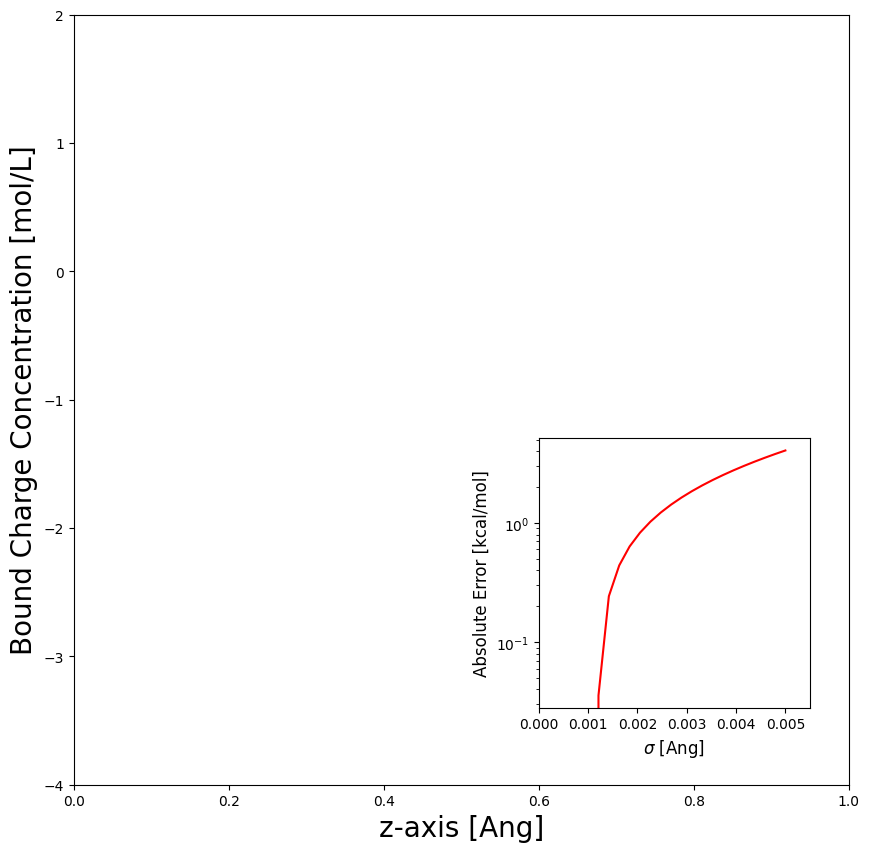

In [46]:
fig = plt.figure(figsize=(10, 10))
ax = plt.axes(xlim=(0, 1), ylim=(-4, 2))
lines = []
sigma_text = ax.text(0.05, 1.8, '', fontsize=20, fontweight='bold')
# create the inset plot axis
axins = ax.inset_axes([0.6, 0.1, 0.35, 0.35])
axins.set_xlim(0, float(ani_df['NC_K'].max()+0.1*ani_df['NC_K'].max()))
# set the ylim of the inset to be to min and max of the error
#axins.set_ylim(0, ani_df['error'].max()+0.1)
#axins.set_ylim(0, ani_df['error'].max()+0.1)
# make the entire plot transparent
axins.patch.set_alpha(0.2)
# plot the error vs. NC_K in the inset plot
inset_line, = axins.plot([], [], color='red')
ax.set_xlabel('z-axis [Ang]', fontsize=20)
ax.set_ylabel('Bound Charge Concentration [mol/L]', fontsize=20)
axins.set_xlabel('$\sigma$ [Ang]', fontsize=12)
axins.set_ylabel('Absolute Error [kcal/mol]', fontsize=12)
axins.set_yscale(  'log'  )

# Read the image file
img = plt.imread('n_octane.png')
img_width = img.shape[1]
img_height = img.shape[0]
x_pos = 0.6
y_pos = 0.1


def init():
    for line in lines:
        line.set_data([], [])
    sigma_text.set_text('')
    return [sigma_text] + lines

def animate(i):
    y = ani_df['rhob'][i]
    x = np.linspace(0, 1, len(y))
    # round sigma to 3 decimal places. make the text bold and in a latex looking format
    #sigma_text.set_text('$\sigma$ = ' + str(round(ani_df['NC_K'][i], 3)))
    sigma_text.set_text('$n_c$ = {:.6f}'.format(ani_df['NC_K'][i]))
    # create the current line
    line, = ax.plot(x, y, color='black', lw=2)
    lines.append(line)

    # fade the previous lines
    if len(lines) > 1:
        for j, prev_line in enumerate(lines[:-1]):
            alpha = 0 + (i - j - 1) / len(ani_df)
            prev_line.set_alpha(alpha)
    # update the inset plot
    inset_line.set_data(ani_df['NC_K'][:i+1], ani_df['error'][:i+1])
    axins.relim()
    axins.autoscale_view(True,True,True)
    return [sigma_text] + lines

anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=len(ani_df), interval=200)

# save as gif
anim.save('NC_Kshape_animation.gif', writer='imagemagick', fps=5)
from IPython.display import Image
Image(url='NC_K_shape_animation.gif')


In [43]:
ani_df['error'].max()

4.066059999999717